In [12]:
# Useful starting lines
import numpy as np
from helpers import *
from methods import *
from process_data import *
from crossvalidation import *
from select_parameter import *

from matplotlib import pyplot as plt    
%load_ext autoreload
%autoreload 2

seed=10

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
from zipfile import ZipFile 
  
# # specifying the zip file name 
file_name = 'Data/test.csv.zip'
  
# opening the zip file in READ mode 
with ZipFile(file_name, 'r') as zip: 
    zip.extractall('Data/') 

In [16]:
def best_degree_lamb_selection(degrees, lambdas, alphas, k_fold, y, tx, seed):
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    comparison = []

    for degree in degrees:
        for lamb in lambdas:
            for alpha in alphas:
                accs_test = []
                for k in range(k_fold):
                        print("{d}/{ld},{l}/{ll},{a}/{la}".format(d=degree,ld=len(degrees),l=lamb,ll=len(lambdas),a=alpha,la=len(alphas)))
                        _, acc_test = cross_validation(y, tx, ridge_regression, k_indices, k, degree, alpha, lamb)
                        accs_test.append(acc_test)
                        comparison.append([degree,lamb,alpha,np.mean(accs_test)])
    
    comparison = np.array(comparison)    
    best_degree = comparison[:,0]
    best_lamb = comparison[:,1]
    best_alpha = comparison[:,2]
    accu = comparison[:,3]
   
    return best_degree, best_lamb, best_alpha, accu


def select_parameters_ridge_regression(y,tX,degrees,lambdas,alphas,k_fold,seed):  
    par_degree = []
    par_lamb = []
    par_alpha = []
    accus = []

    # split in 4 subsets the training set
    msk_jets = get_jet_masks(tX)


    for idx in range(len(msk_jets)):
        tx = tX[msk_jets[idx]]
        ty = y[msk_jets[idx]]
        
        degree,lamb,alpha,accu = best_degree_lamb_selection(degrees, lambdas, alphas, k_fold, ty, tx, seed)
        par_degree.append(degree)
        par_lamb.append(lamb)
        par_alpha.append(alpha)
        accus.append(accu)

    return par_degree, par_lamb, par_alpha, accus

""" for least square """
def best_degree_selection(degrees, k_fold, y, tx, alpha, seed):
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    comparison = []

    for deg in degrees:
        # cross validation
        degree = [deg]*4
        accs_test = []
        for k in range(k_fold):
          _, acc_test = cross_validation_least_squares(y, tx, k_indices, k, degrees, alpha)
          accs_test.append(acc_test)
        comparison.append([deg,np.mean(accs_test)])
    
    comparison = np.array(comparison)
    ind_best =  np.argmax(comparison[:,1])      
    best_degree = comparison[ind_best,0]
    accu = comparison[ind_best,1]
   
    return best_degree, accu
    
def select_parameters_least_squares(y,tX,degrees,alpha,k_fold,seed):  
    par_degree = []
    accus = []

    # split in 4 subsets the training set
    msk_jets = get_jet_masks(tX)

    for idx in range(len(msk_jets)):
        tx = tX[msk_jets[idx]]
        ty = y[msk_jets[idx]]
        
        degree, accu = best_degree_selection(degrees, k_fold, ty, tx, alpha,seed)
        par_degree.append(degree)
        accus.append(accu)

    return par_degree,  accus

In [15]:
y, tX, ids = load_csv_data('Data/train.csv')
_, tX_test, ids_test = load_csv_data('Data/test.csv')

# Comparing all 6 methods

# CV for Ridge

In [17]:
# Model parameters for ridge regression
#tuning parameters for each category
degrees_candidates = np.arange(1,11)
alphas_candidates=[2,3,4,5,6]
lambdas_candidates = np.logspace(-7,-1,7)
#lambdas_candidates=[1e-5]


k_fold = 2
par_degree, par_lambda, par_alpha, accu = select_parameters_ridge_regression(y,tX,degrees_candidates,lambdas_candidates,
                                                                  alphas_candidates,k_fold,seed)
par_degree, par_lambda, par_alpha, accu

722
5/10,0.01/7,4/5
0.8520305478205729 0.8496043671252516
5/10,0.01/7,4/5
0.8529679358164926 0.8484739874831132
5/10,0.01/7,5/5
0.8523889608778363 0.8502936230046042
5/10,0.01/7,5/5
0.8535744809903228 0.8485291279534615
5/10,0.01/7,6/5
0.8526922334647514 0.8502936230046042
5/10,0.01/7,6/5
0.8540156047531086 0.848418847012765
5/10,0.1/7,2/5
0.847619310192716 0.8456618234953545
5/10,0.1/7,2/5
0.8483637065424168 0.8462683686691848
5/10,0.1/7,3/5
0.847619310192716 0.8467370626671445
5/10,0.1/7,3/5
0.8479225827796311 0.8464613603154035
5/10,0.1/7,4/5
0.8485566981886355 0.8475917399575419
5/10,0.1/7,4/5
0.8492459540679882 0.846874913843015
5/10,0.1/7,5/5
0.8490529624217694 0.8473436078409748
5/10,0.1/7,5/5
0.8491632433624658 0.8468197733726669
5/10,0.1/7,6/5
0.8496043671252516 0.8472333269002784
5/10,0.1/7,6/5
0.8492459540679882 0.8464337900802293
6/10,1e-07/7,2/5
0.855449256982162 0.8478674423092829
6/10,1e-07/7,2/5
0.8566623473298227 0.848666979129332
6/10,1e-07/7,3/5
0.8556146783932067 0.

811, 0.85028825, 0.85028825, 0.85023821, 0.85074866,
         0.85032829, 0.85058852, 0.85039835, 0.85012811, 0.84993795,
         0.8497678 , 0.84993795, 0.84986788, 0.85005805, 0.85050845,
         0.85016815, 0.85026824, 0.85013812, 0.85026824, 0.84994795,
         0.84928737, 0.8496577 , 0.84924734, 0.8497778 , 0.8498879 ,
         0.8498879 , 0.8495476 , 0.84955761, 0.84986788, 0.8496577 ,
         0.84868684, 0.84907719, 0.848867  , 0.8490872 , 0.84882697,
         0.84926736, 0.84864681, 0.84902714, 0.84892706, 0.84918728,
         0.83031067, 0.8393186 , 0.84708544, 0.84776603, 0.8473857 ,
         0.847726  , 0.84698535, 0.84753583, 0.84718552, 0.84760589]),
  array([0.81478902, 0.81502115, 0.8158207 , 0.81600124, 0.81672341,
         0.81681368, 0.81687816, 0.81687816, 0.81708449, 0.8170716 ,
         0.8142474 , 0.81476323, 0.81540803, 0.81602703, 0.81662024,
         0.81683947, 0.81682658, 0.81708449, 0.81716187, 0.81716187,
         0.81427319, 0.8148535 , 0.81512432, 0.8

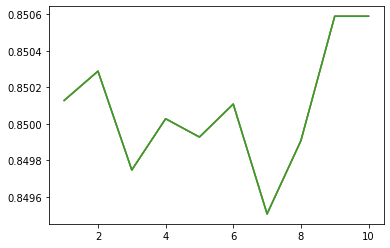

In [37]:
for l in range(len(par_degree)):
    plt.plot(par_degree[0][::70],accu[0][::70])

In [18]:

# save numpy array as npy file
from numpy import asarray
from numpy import save
# define data
# save to npy file
save('accu.npy', accu)

In [36]:
accu[0][:70:70]

array([0.85012811])

In [33]:
np.arange(0,10)[::2]

array([0, 2, 4, 6, 8])